<a href="https://colab.research.google.com/github/nilabja10201992/Cryptocurrency-Price-Prediction/blob/master/bitcoinlarge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9,la;q=0.8,hi;q=0.7,fr;q=0.6" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-datasets/1346/330249/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1556728085&Signature=XGXS3hu63l4vMnFgnrKdryrBxzOedh6xVvzb2OOevAEcPMUAB7PtYA5VA%2BLQvfZ8KsbH5jAgx2UH3ZB0qf8LueI11aT4NyjHsrW4lcKUVh9ydPdFoz4UukeP%2BNHA5JT0cBx7%2BBcarqyPuICUpdcdlB0PM7Qgcze3Cz0BgfvnXgtMs7kacjbM1l7vGTnTJSxuLBnMSBwugGO7D6Pnd6jQqLr%2BrXmkr2myfKB8n61Y6yzg38KAvMgqiThT7betBTa0k7ect7KcmSlPyu3dYZ4tLfg6DeNpTi9nKn8i%2FazRO6mFj%2BbpMqJdNxwd%2FMGDG86v%2BLAnbfmyGRtEBby4ZsqYmA%3D%3D" -O "bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip" -c

--2019-04-28 18:52:25--  https://storage.googleapis.com/kaggle-datasets/1346/330249/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1556728085&Signature=XGXS3hu63l4vMnFgnrKdryrBxzOedh6xVvzb2OOevAEcPMUAB7PtYA5VA%2BLQvfZ8KsbH5jAgx2UH3ZB0qf8LueI11aT4NyjHsrW4lcKUVh9ydPdFoz4UukeP%2BNHA5JT0cBx7%2BBcarqyPuICUpdcdlB0PM7Qgcze3Cz0BgfvnXgtMs7kacjbM1l7vGTnTJSxuLBnMSBwugGO7D6Pnd6jQqLr%2BrXmkr2myfKB8n61Y6yzg38KAvMgqiThT7betBTa0k7ect7KcmSlPyu3dYZ4tLfg6DeNpTi9nKn8i%2FazRO6mFj%2BbpMqJdNxwd%2FMGDG86v%2BLAnbfmyGRtEBby4ZsqYmA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
!unzip bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip

Archive:  bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv.zip
replace bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Library for Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, CuDNNLSTM, Dropout, CuDNNGRU, Bidirectional
from keras.optimizers import SGD
import math
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [0]:
def mean_absolute_scaled_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    dem = 0
    num = 0
    for i in range(n-1):
        dem += abs(y_true[i+1] - y_true[i])
    for i in range(n):
        num = abs(y_pred[i] - y_true[i])
        num = np.squeeze(num)
        res += num/dem
    res = np.squeeze(res)
    #print(num, dem, res)
    return res/n

In [0]:
def systematic_mean_absolute_percentage_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    for i in range(n):
        num = np.abs(y_pred[i] - y_true[i])
        dem = (np.abs(y_true[i]) + np.abs(y_pred[i]))/2
        res += num/dem
    res = np.squeeze(res)
    return 100*(res/n)

In [0]:
coinbase = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv")
    
coinbase.describe()


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.778817e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06
mean,1.438908e+09,2.654668e+03,2.656783e+03,2.652286e+03,2.654650e+03,1.068140e+01,2.395856e+04,2.654510e+03
std,6.561491e+07,3.529553e+03,3.533184e+03,3.525347e+03,3.529522e+03,3.476243e+01,8.829950e+04,3.529271e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.382000e+09,3.489800e+02,3.491500e+02,3.487800e+02,3.489900e+02,4.500000e-01,2.480382e+02,3.489681e+02
50%,1.439071e+09,6.595600e+02,6.600000e+02,6.589900e+02,6.596200e+02,2.095163e+00,1.814312e+03,6.595521e+02
75%,1.495753e+09,4.045492e+03,4.049115e+03,4.042050e+03,4.045400e+03,8.284949e+00,1.303504e+04,4.045115e+03
max,1.552435e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,5.483271e+06,1.966330e+04


In [0]:
a = coinbase["Close"][1200000:].fillna(method="backfill")

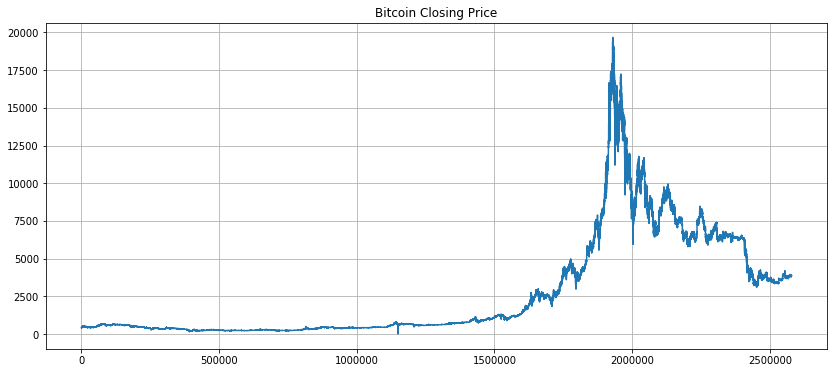

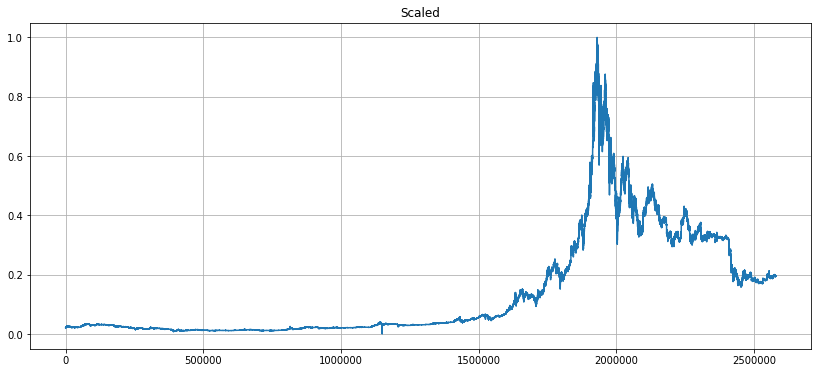

In [0]:
close_price = np.array(a).reshape(-1,1)
plt.figure(figsize=(14,6))
plt.title("Bitcoin Closing Price")
plt.grid()
plt.plot(close_price)

sc = MinMaxScaler()
close_priceSC = sc.fit_transform(close_price)
plt.figure(figsize=(14,6))
plt.title("Scaled")
plt.grid()
plt.plot(close_priceSC)

In [0]:
timestep = 100
X = []
y = []
for i in range(timestep, len(close_priceSC)):
    X.append(close_priceSC[i-timestep:i, 0])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

(2578717, 100) (2578717,)


In [0]:
X_train = X[:2400000,:]
X_test = X[2400000:,:]

y_train = y[:2400000]
y_test = y[2400000:]


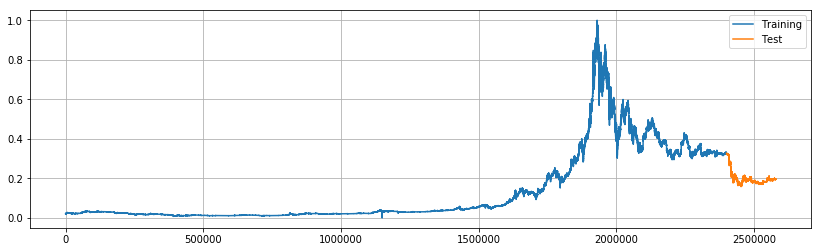

In [0]:
plt.figure(figsize=(14,4))
plt.plot(range(2400000),y_train)
plt.plot(range(2400000, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()


In [0]:
X_train = X_train.reshape(-1,timestep,1)
X_test = X_test.reshape(-1,timestep,1)

In [12]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=64, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=256, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=512))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=5, batch_size=1024)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
2400000/2400000 [==============================] - 2246s 936us/step - loss: 0.0075
Epoch 2/5
2400000/2400000 [==============================] - 2235s 931us/step - loss: 0.0054
Epoch 3/5
2400000/2400000 [==============================] - 2236s 931us/step - loss: 0.0052
Epoch 4/5
2400000/2400000 [==============================] - 2243s 935us/step - loss: 0.0052
Epoch 5/5
2400000/2400000 [==============================] - 2219s 924us/step - loss: 0.0050
CPU times: user 3h 19min 7s, sys: 30min 45s, total: 3h 49min 52s
Wall time: 3h 6min 23s


In [13]:
%%time
y_pred = regressor.predict(X_test)

CPU times: user 31min 27s, sys: 3min 19s, total: 34min 46s
Wall time: 21min 11s


In [21]:
print("Mean absolute error {0}\nSystematic mean absolute percentage error {1} \nMean_absolute_scaled_error {2}\nMean square error {3}".format(mean_absolute_error(y_test, y_pred),systematic_mean_absolute_percentage_error(y_test, y_pred), mean_absolute_scaled_error(y_test, y_pred), mean_squared_error(y_test, y_pred)))

Mean absolute error 0.002047905546904429
Systematic mean absolute percentage error 1.0626363560300642 
Mean_absolute_scaled_error 9.217731721848687e-05
Mean square error 4.653809580282877e-06


Text(0, 0.5, 'Price')

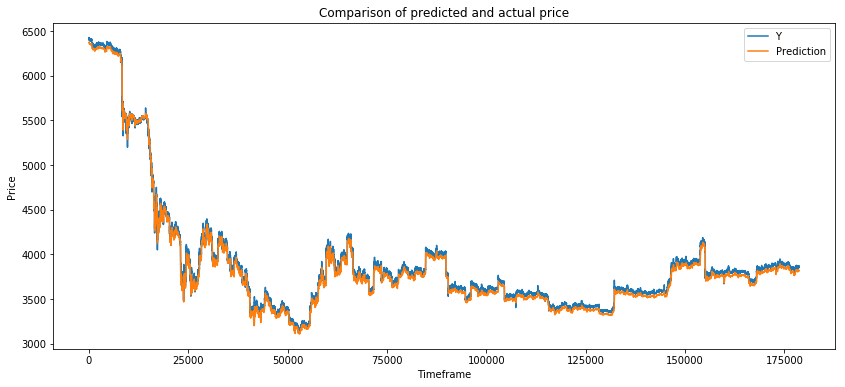

In [17]:
plt.figure(figsize=(14,6))
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison of predicted and actual price")
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")